# Final Project

By Fred Angelo B. Garcia

Evolve single stars of Z ~= 0.017 (solar composition), and Z= 10^-4, and  0.5, 1.0, 2.0, 5.0, 10.0, 30.0 and 60.0 solar masses from the main sequence to as far as you can or until 10^11 years.

Plot each stars' progress through the HRD. Tabulate the most important changes in each star's structure/evolution (e.g. core helium flash) as a function of time.

> Essentially, we have 2 mass classes of stars we want to simulate: (1) those who we evolve to white dwarfs: 0.5 - 5.0 solar mass to those that undergoe core collapse (10 - 60 solar masses). In addition we have to these these for both low and solar metallicities 

#### jobs
- `05052546998` - 1 Msun 0.02 Z, 1e12 yr evolution, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547000` - 0.5 Msun 0.02 Z, 1e11 yr evolution, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547038` - 0.5 Msun 0.02 Z, 1e11 yr evolution, saved every 25 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547040` - 0.5 Msun 0.02 Z, 1e11 yr evolution, saved every 25 models, resolution: 1e-4 variance control, 2.0 mesh delta coefficient 

- `05062547194` - 0.5 Msun 0.02 Z, 1e12 yr evolution, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547002` - 2.0 Msun 0.02 Z, 1e11 yr evolution, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547004` - 5.0 Msun 0.02 Z, 1e11 yr evolution, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547006` - 10.0 Msun 0.02 Z, evolution till iron core collapse, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient, delta_lg_XH_cntr_max = -4

- `05052547012` - 30.0 Msun 0.02 Z, evolution till iron core collapse, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient, delta_lg_XH_cntr_max = -4

- `05052547056` - 30.0 Msun 0.02 Z, 1e8 yr evolution, saved every 25 models, resolution: 1e-5 variance control, 2.0 mesh delta coefficient, delta_lg_XH_cntr_max = -4

- `05052547076` - 30.0 Msun 0.02 Z, 1e11, saved every 25 models, resolution: 1e-5 variance control, 2.0 mesh delta coefficient, delta_lg_XH_cntr_max = -6, 

- `05052547014` - 60.0 Msun 0.02 Z, evolution till iron core collapse, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient, delta_lg_XH_cntr_max = -3

#### now for metal poor stars (0.0001 Z)

- `05052547016` - 0.5 Msun 0.0001 Z, 1e11 yr evolution, saved every 100 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547018` - 1 Msun 0.0001 Z, 1e11 yr evolution, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05062547086` - 2 Msun 0.0001 Z, 1e11 yr evolution, saved every 100 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05062547088` - 5 Msun 0.0001 Z, 1e11 yr evolution, saved every 100 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05062547090` - 10 Msun 0.0001 Z,  evolution till iron core collapse, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient 

- `05052547026` - 30 Msun 0.0001 Z,  evolution till iron core collapse, saved every 50 models, resolution: 1e-2 variance control, 2.0 mesh delta coefficient

- `05062547136` - 60 Msun 0.0001 Z,  1e11 yrs, saved every 25 models, resolution: 1e-3 variance control, 2.0 mesh delta coefficient,delta_lg_XH_cntr_min -4

### example run for 0.5 solar mass Z=0.0001 star
<video controls src="./MESA-Web_Job_05052547016.mp4" width=800 />



The 0.5 star ends as a WD above

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as mr
import glob
import os
import matplotlib as mpl
from IPython.display import Video
from astropy import units as u
from astropy import constants as const

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update(
    {
        "text.usetex": True,
        # "font.family": "Helvetica",
        "font.family": "serif",
        "mathtext.fontset": "cm",
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "font.size": 11,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "ytick.right": True,
        "xtick.top": True,
        "xtick.major.size": 4,
        "ytick.major.size": 4,
        "xtick.minor.size": 2,
        "ytick.minor.size": 2,
    }
)

In [104]:
metallicities = [0.02, 0.0001]
masses = [0.5, 1.0, 2.0, 5.0, 10.0, 30.0, 60.0]  # solar masses
paths_solar_metals = [
    "0p5M_0p02Z-3",
    "1p0M_0p02Z",
    "2p0M_0p02Z",
    "5p0M_0p02Z",
    "10p0M_0p02Z",
    "30p0M_0p02Z-1",
    "60p0M_0p02Z",
]
paths_low_metals = [
    "0p5M_0p0001Z",
    "1p0M_0p0001Z",
    "2p0M_0p0001Z",
    "5p0M_0p0001Z",
    "10p0M_0p0001Z",
    "30p0M_0p0001Z",
    "60p0M_0p0001Z",
]

## HR Diagrams

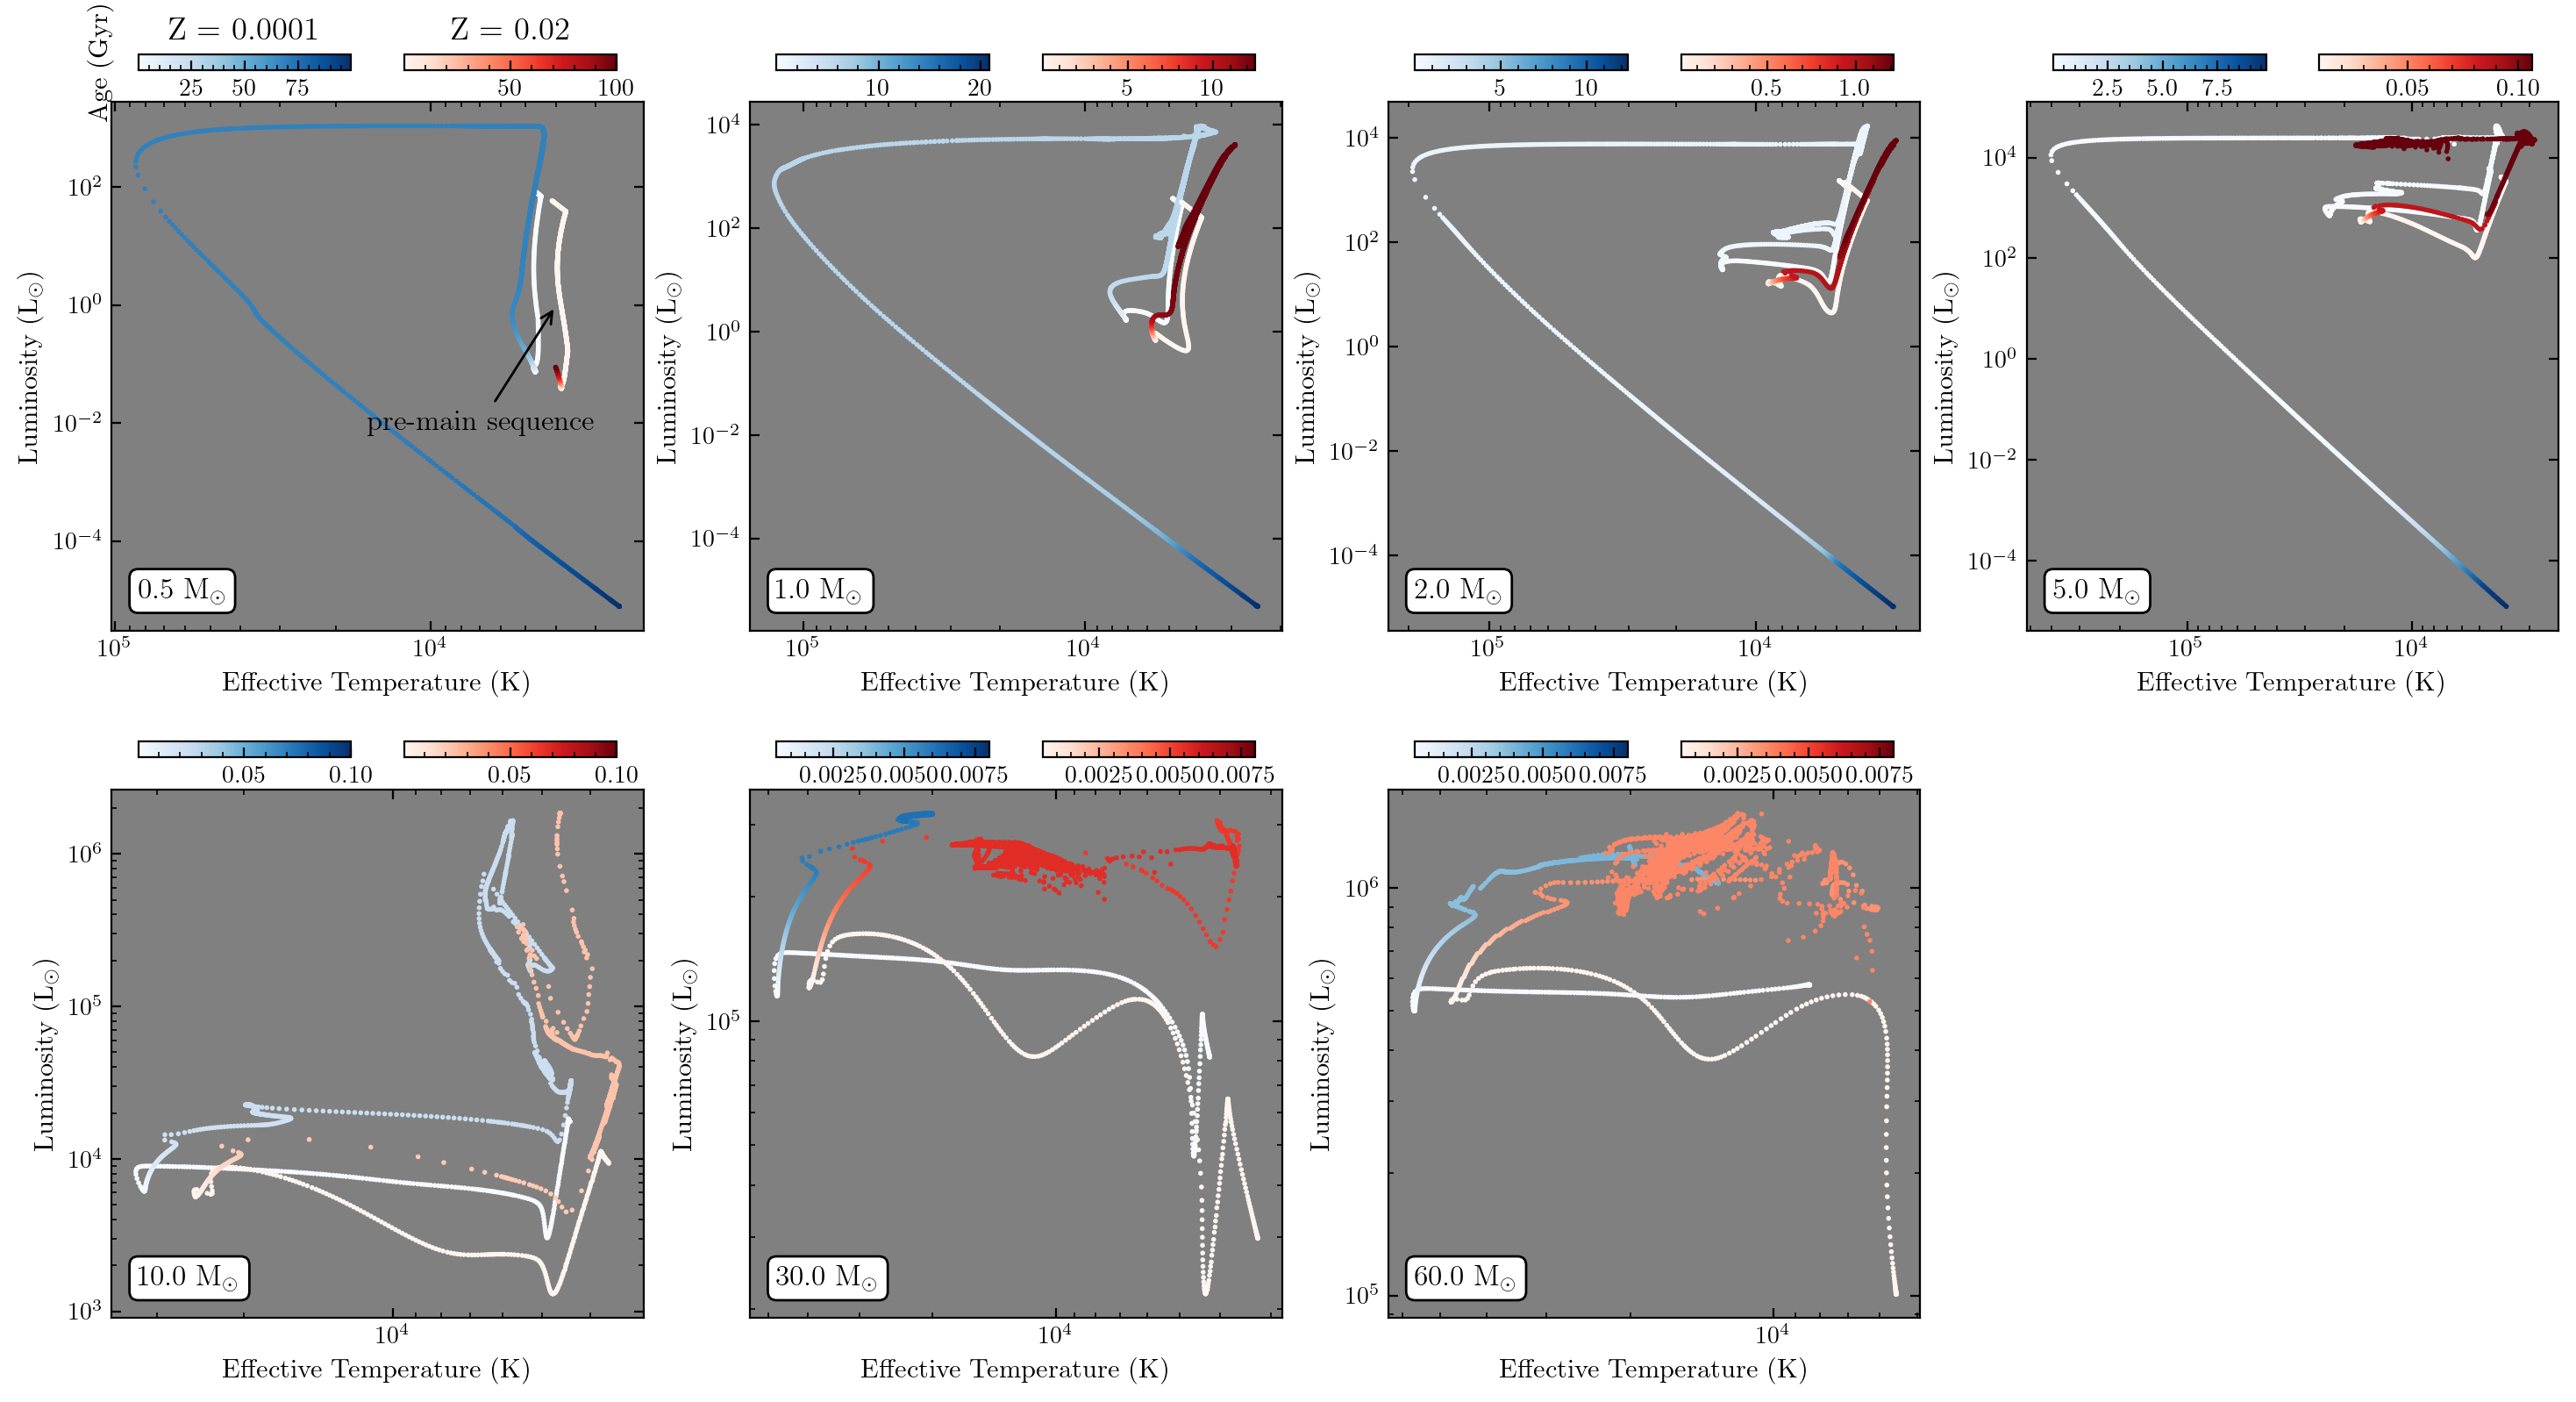

In [172]:
fig, ax = plt.subplots(2, 4, figsize=(18, 9), dpi=200)
plt.subplots_adjust(hspace=0.3)
ax = ax.flatten()


def luminosity_theory(R, Teff):
    """assuming black body"""
    Lum = 4 * np.pi * const.sigma_sb * (R.to(u.m) ** 2 * Teff**4)
    return Lum.to(u.W) / const.L_sun


# make theory luminosity, each row is a different radius
radii = np.array([0.5, 1.0, 20, 50, 100, 200]) * u.R_sun
T_eff_array = np.geomspace(1e3, 1e6, 100) * u.K
luminosities = []
# for each radius, calculate the luminosity
for i, R in enumerate(radii):
    Lum = luminosity_theory(R, T_eff_array)
    # convert to log scale
    # log_Lum = np.log10(Lum.value)
    # add to the list
    luminosities.append(Lum.value)


for i, (lowh, highh) in enumerate(zip(paths_low_metals, paths_solar_metals)):
    loh = mr.MesaData(os.path.join("../{}".format(lowh), "trimmed_history.data"))
    hih = mr.MesaData(os.path.join("../{}".format(highh), "trimmed_history.data"))
    mass = masses[i]
    lo_teff = 10**loh.log_Teff
    lo_lum = 10**loh.log_L

    hi_teff = 10**hih.log_Teff
    hi_lum = 10**hih.log_L

    lo_ages = loh.star_age / 1e9
    hi_ages = hih.star_age / 1e9

    # make a cmap, linear, and normalize the scatter points
    cmap_low = plt.get_cmap("Blues")
    cmap_high = plt.get_cmap("Reds")

    # # plot the theoretical luminosity
    # for l, lum in enumerate(luminosities):
    #     # plot the theoretical luminosity
    #     ax[i].plot(
    #         T_eff_array.value,
    #         lum,
    #         label=f"{radii[l].value} R$_\odot$",
    #         color="k",
    #         ls="--",
    #         alpha=0.5,
    #     )

    if mass > 10:
        norm_low = mpl.colors.Normalize(vmin=0.0005, vmax=0.008)  # in gyrs
        norm_high = mpl.colors.Normalize(vmin=0.0005, vmax=0.008)
    elif mass == 10:
        norm_low = mpl.colors.Normalize(vmin=0.0005, vmax=0.1)  # in gyrs
        norm_high = mpl.colors.Normalize(vmin=0.0005, vmax=0.1)
    else:
        norm_low = mpl.colors.Normalize(vmin=0.01, vmax=lo_ages.max())  # in gyrs
        norm_high = mpl.colors.Normalize(vmin=0.01, vmax=hi_ages.max())

    sm_low = plt.cm.ScalarMappable(cmap=cmap_low, norm=norm_low)
    sm_high = plt.cm.ScalarMappable(cmap=cmap_high, norm=norm_high)

    low_scatter = ax[i].scatter(
        lo_teff,
        lo_lum,
        label="Z = 0.0001",
        s=1,
        c=lo_ages,
        cmap="Blues",
        norm=norm_low,
    )
    high_scatter = ax[i].scatter(
        hi_teff,
        hi_lum,
        label="Z = 0.02",
        s=1,
        c=hi_ages,
        cmap="Reds",
        norm=norm_high,
    )

    ax[i].set(
        xlabel="Effective Temperature (K)",
        ylabel="Luminosity (L$_\odot$)",
        xscale="log",
        yscale="log",
    )
    # reverse x axis
    ax[i].invert_xaxis()

    # make inset axes for the colorbars, horizontal
    low_inset_ax = ax[i].inset_axes([0.05, 1.06, 0.4, 0.03], transform=ax[i].transAxes)
    high_inset_ax = ax[i].inset_axes([0.55, 1.06, 0.4, 0.03], transform=ax[i].transAxes)
    # make colorbars
    cbar_low = plt.colorbar(sm_low, cax=low_inset_ax, orientation="horizontal")
    cbar_high = plt.colorbar(sm_high, cax=high_inset_ax, orientation="horizontal")
    if i == 0:
        # cbar_low.set_xlabel("Age (Gyr)")
        # cbar_high.set_label("Age (Gyr)")
        low_inset_ax.set_title("Z = 0.0001")
        low_inset_ax.set_ylabel("Age (Gyr)", labelpad=10)
        high_inset_ax.set_title("Z = 0.02")

    # add minor ticks to colorbars
    low_inset_ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    high_inset_ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    # add the mass label
    ax[i].text(
        0.05,
        0.05,
        f"{mass} M$_\odot$",
        transform=ax[i].transAxes,
        fontsize=12,
        verticalalignment="bottom",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    )

    # make each plot color grey
    ax[i].set_facecolor("grey")

# add an annotation and an arrow for the first panel
ax[0].annotate(
    "pre-main sequence",
    xy=(4000, 1),
    xytext=(3000, 1e-2),
    arrowprops=dict(arrowstyle="->", lw=1),
    fontsize=12,
    ha="right",
    va="center",
)
# turn off the last panel
ax[-1].axis("off")
plt.show()

__In the plot above__, we show the tracks for all stellar mass (each panel, see bottom left for the ZAMS mass) depicting both the solar (Z~0.02) and well as the low (Z=0.0001) metallicities, denoted with red and blue hues respectively. See the color bar atop each panel to see the corresponding age in Gyrs, note that the scales differ between each panel to emphasize the differing and contrasting timescales. 

Also, we point out that we simulate the stars starting with the pre-main sequence contraction and evolve them as far as we can. Note, the first panel (top left) annotates the pre main sequence track for our 0.5 Msun star with solar abundance which settles into the main sequence by the end of the simulatio. 

Note that this solar abundance star, by 1e11 Yrs, has yet to reach the WD phase, therefore we just stop the simulation short while this star is still hydrogen burning. 
For the lower metallicity (Z~0.0001), in the span of 1e11 Yrs, it is able to complete its evolution towards the degenerate phase. This is one of our results, in that the lower metallicity star appears to be able to go through more of its evolutionary phases for a given amount of time -- a maximum of 1e11 year simulation run time in our case -- than the solar metallicity one



## Relevant timescales for different types of burning

> we can estimate the flashes by looking at the different core masses over time, particlarly the helium core and the carbon core 
- c_core_mass
- he_core_radius
- o_core_mass
> other relvant timescales can be seen when monitoring the following below
- log_R
- log_Teff
- log_L


--- mass:  0.5
t_helium_flash_low: 63557.05 Myr
t_oxygen_flash_low: 0.00 Myr
t_carbon_flash_low: 0.00 Myr
--- mass:  1.0
t_helium_flash_low: 5082.69 Myr
t_oxygen_flash_low: 0.00 Myr
t_carbon_flash_low: 5952.77 Myr
--- mass:  2.0
t_helium_flash_low: 514.53 Myr
t_oxygen_flash_low: 0.00 Myr
t_carbon_flash_low: 697.83 Myr
--- mass:  5.0
t_helium_flash_low: 70.04 Myr
t_oxygen_flash_low: 0.00 Myr
t_carbon_flash_low: 79.33 Myr
--- mass:  10.0
t_helium_flash_low: 20.69 Myr
t_oxygen_flash_low: 23.14 Myr
t_carbon_flash_low: 22.19 Myr
--- mass:  30.0
t_helium_flash_low: 5.80 Myr
t_oxygen_flash_low: 6.15 Myr
t_carbon_flash_low: 6.11 Myr
--- mass:  60.0
t_helium_flash_low: 3.66 Myr
t_oxygen_flash_low: 4.03 Myr
t_carbon_flash_low: 3.96 Myr


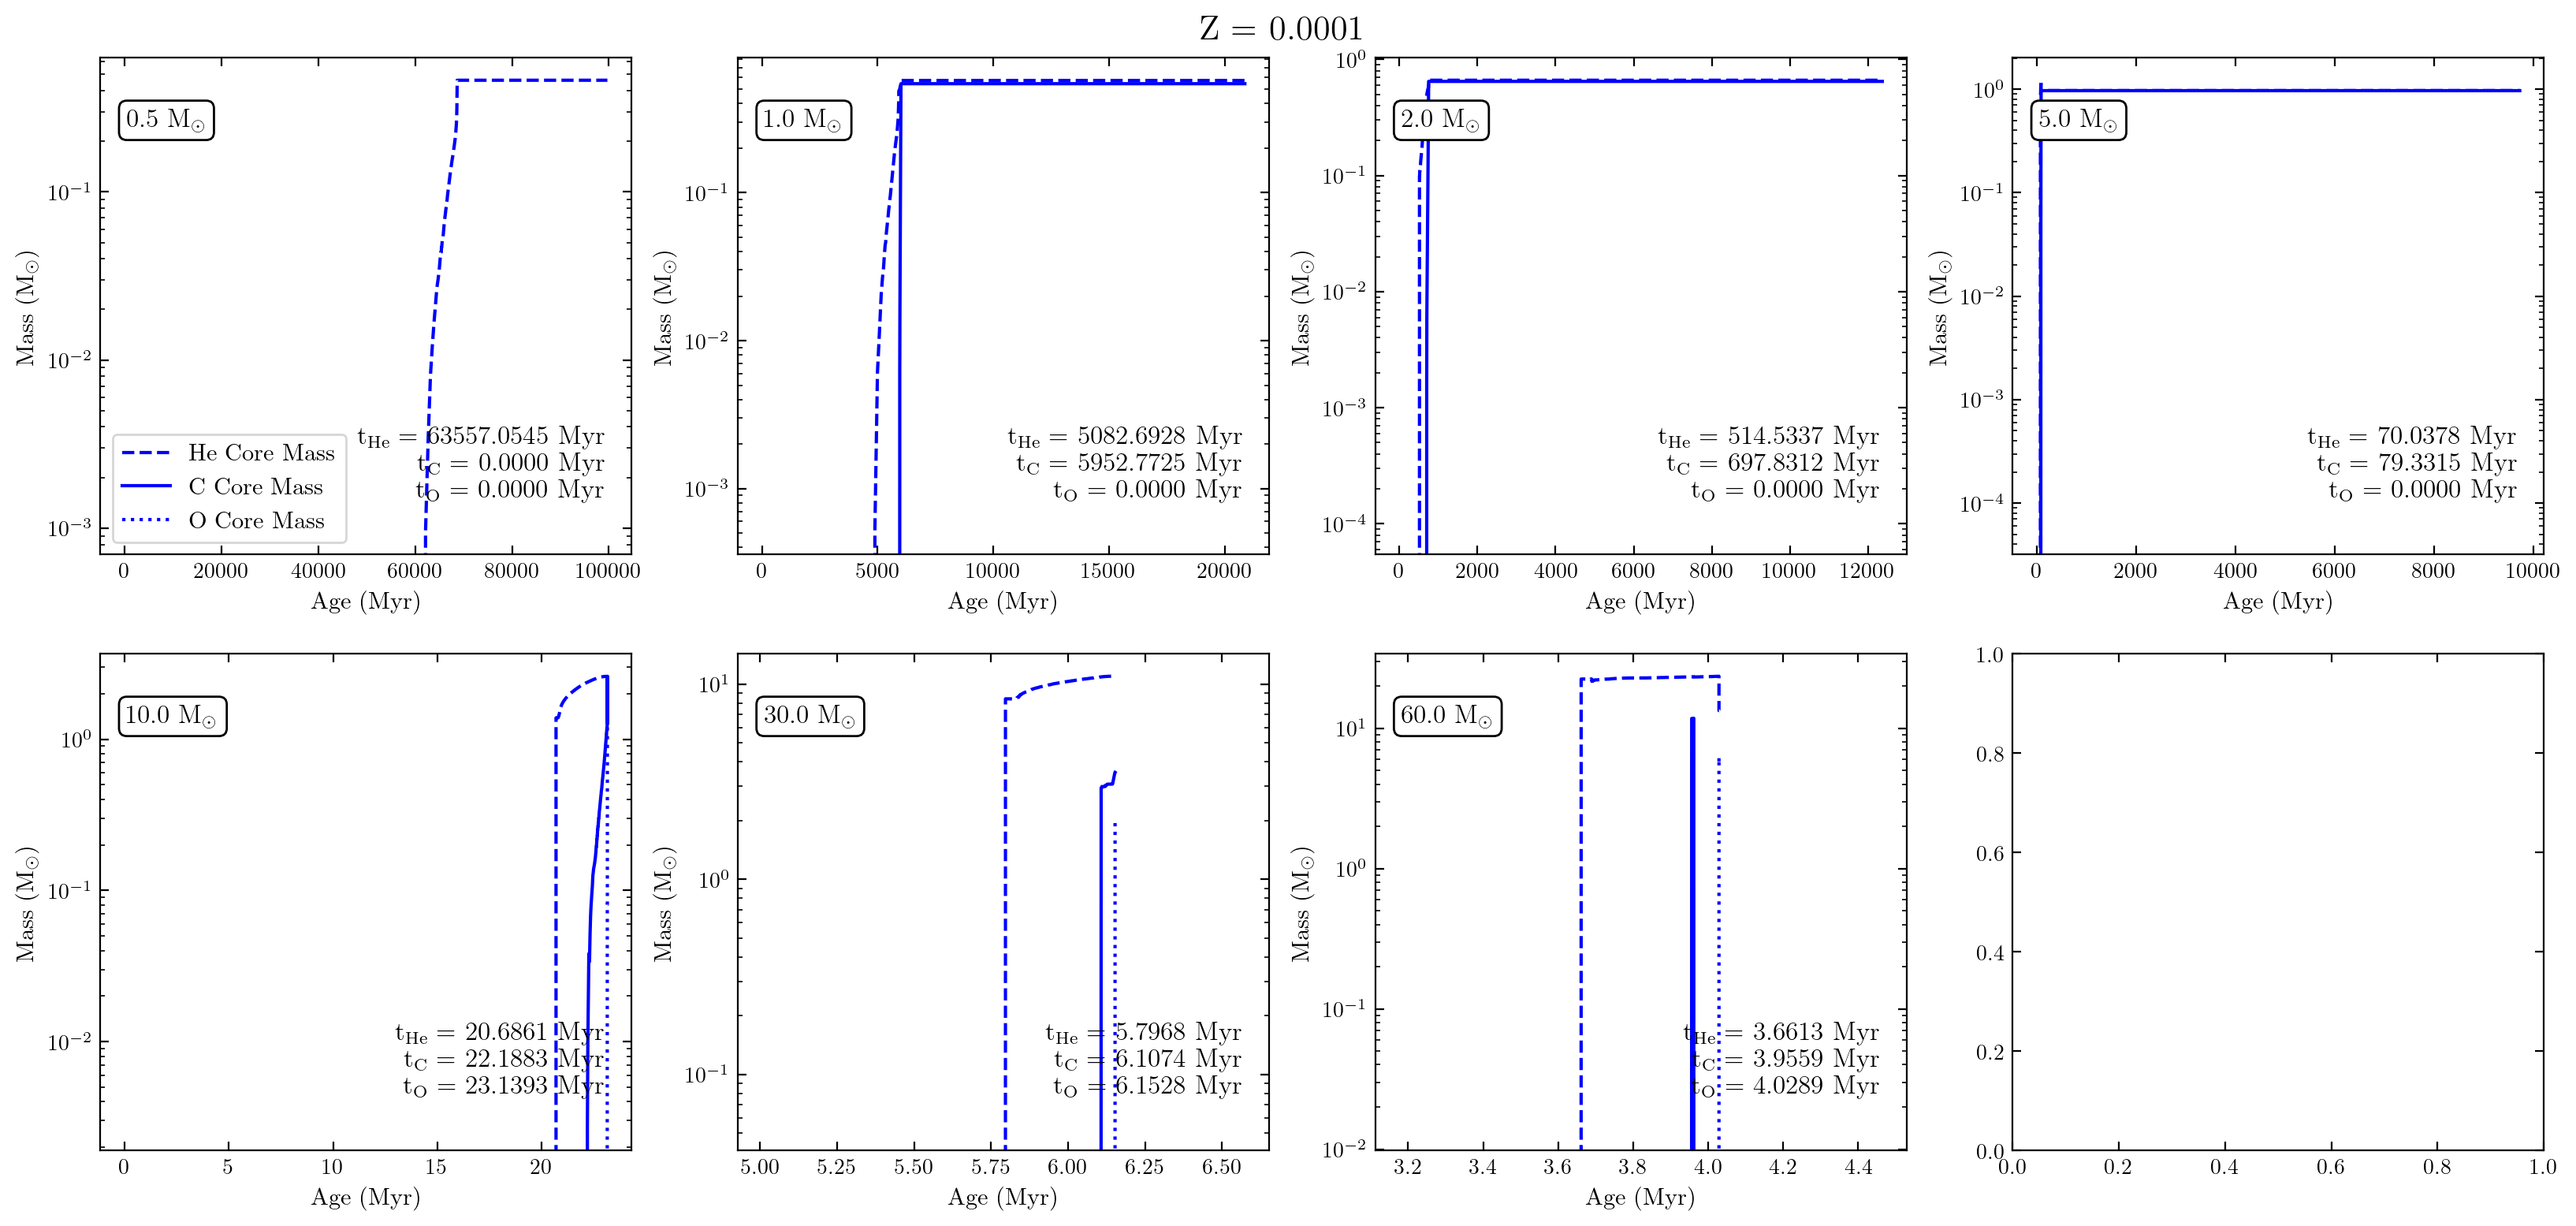

In [ ]:
# low metallicity Z = 0.0001

fig, ax = plt.subplots(2, 4, figsize=(20, 9), dpi=200)
plt.subplots_adjust(hspace=0.2)
ax = ax.flatten()

low_helium_burning_start = []
low_carbon_burning_start = []
low_oxygen_burning_start = []

for i, lowh in enumerate(paths_low_metals):
    loh = mr.MesaData(os.path.join("../{}".format(lowh), "trimmed_history.data"))
    mass = masses[i]
    lo_teff = 10**loh.log_Teff
    lo_lum = 10**loh.log_L

    lo_ages = loh.star_age / 1e6
    lo_he_core_radius = loh.he_core_radius
    lo_he_core_mass = loh.he_core_mass
    lo_c_core_mass = loh.c_core_mass
    lo_ox_core_mass = loh.o_core_mass

    # find the first time when the Carbon core mass is non-zero
    try:
        t_carbon_flash_low = lo_ages[np.where(lo_c_core_mass > 0)[0][0]]
    except:
        t_carbon_flash_low = 0

    # same for oxygen
    try:
        t_oxygen_flash_low = lo_ages[np.where(lo_ox_core_mass > 0)[0][0]]
    except:
        t_oxygen_flash_low = 0

    # make xlim such that the mass is more than some fraction f
    f = 0.01
    try:
        t_helium_flash_low = lo_ages[np.where(lo_he_core_mass > f)[0][0]]
    except:
        t_helium_flash_low = 0

    print("--- mass: ", mass)
    print(f"t_helium_flash_low: {t_helium_flash_low:.2f} Myr")
    print(f"t_oxygen_flash_low: {t_oxygen_flash_low:.2f} Myr")
    print(f"t_carbon_flash_low: {t_carbon_flash_low:.2f} Myr")

    low_helium_burning_start.append(t_helium_flash_low)
    low_carbon_burning_start.append(t_carbon_flash_low)
    low_oxygen_burning_start.append(t_oxygen_flash_low)

    ax[i].plot(
        lo_ages, lo_he_core_mass, color="blue", linestyle="--", label="He Core Mass"
    )
    ax[i].plot(lo_ages, lo_c_core_mass, color="blue", label="C Core Mass")
    ax[i].plot(
        lo_ages, lo_ox_core_mass, color="blue", linestyle=":", label="O Core Mass"
    )

    if i == 0:
        ax[i].legend(loc="lower left")

    if mass > 10:
        xlim = (t_helium_flash_low * 0.85, lo_ages.max() + 0.5)
        ax[i].set(
            xlabel="Age (Myr)", ylabel="Mass (M$_\odot$)", yscale="log", xlim=xlim
        )
    else:
        ax[i].set(xlabel="Age (Myr)", ylabel="Mass (M$_\odot$)", yscale="log")

    # add relevant timescales on the bottom right
    timescale_text = r"t$_{{\rm He}}$ = {:.4f} Myr" "\n".format(t_helium_flash_low)
    timescale_text += r"t$_{{\rm C}}$ = {:.4f} Myr" "\n".format(t_carbon_flash_low)
    timescale_text += r"t$_{{\rm O}}$ = {:.4f} Myr" "\n".format(t_oxygen_flash_low)

    ax[i].text(
        0.95,
        0.05,
        timescale_text,
        transform=ax[i].transAxes,
        fontsize=12,
        verticalalignment="bottom",
        horizontalalignment="right",
    )

    # add the mass label
    ax[i].text(
        0.05,
        0.85,
        f"{mass} M$_\odot$",
        transform=ax[i].transAxes,
        fontsize=12,
        verticalalignment="bottom",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    )

# add a figure title
fig.suptitle("Z = 0.0001", fontsize=16, y=0.91)
ax[-1].axis("off")
plt.show()

--- mass:  0.5
t_helium_flash_high: 0.00 Myr
t_oxygen_flash_high: 0.00 Myr
t_carbon_flash_high: 0.00 Myr


/tmp/ipykernel_944805/1192627125.py:65: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i].set(


--- mass:  1.0
t_helium_flash_high: 9262.14 Myr
t_oxygen_flash_high: 0.00 Myr
t_carbon_flash_high: 12409.53 Myr
--- mass:  2.0
t_helium_flash_high: 942.66 Myr
t_oxygen_flash_high: 0.00 Myr
t_carbon_flash_high: 1143.27 Myr
--- mass:  5.0
t_helium_flash_high: 84.22 Myr
t_oxygen_flash_high: 0.00 Myr
t_carbon_flash_high: 96.96 Myr
--- mass:  10.0
t_helium_flash_high: 19.85 Myr
t_oxygen_flash_high: 22.81 Myr
t_carbon_flash_high: 21.63 Myr
--- mass:  30.0
t_helium_flash_high: 5.19 Myr
t_oxygen_flash_high: 0.00 Myr
t_carbon_flash_high: 5.54 Myr
--- mass:  60.0
t_helium_flash_high: 3.30 Myr
t_oxygen_flash_high: 0.00 Myr
t_carbon_flash_high: 3.58 Myr


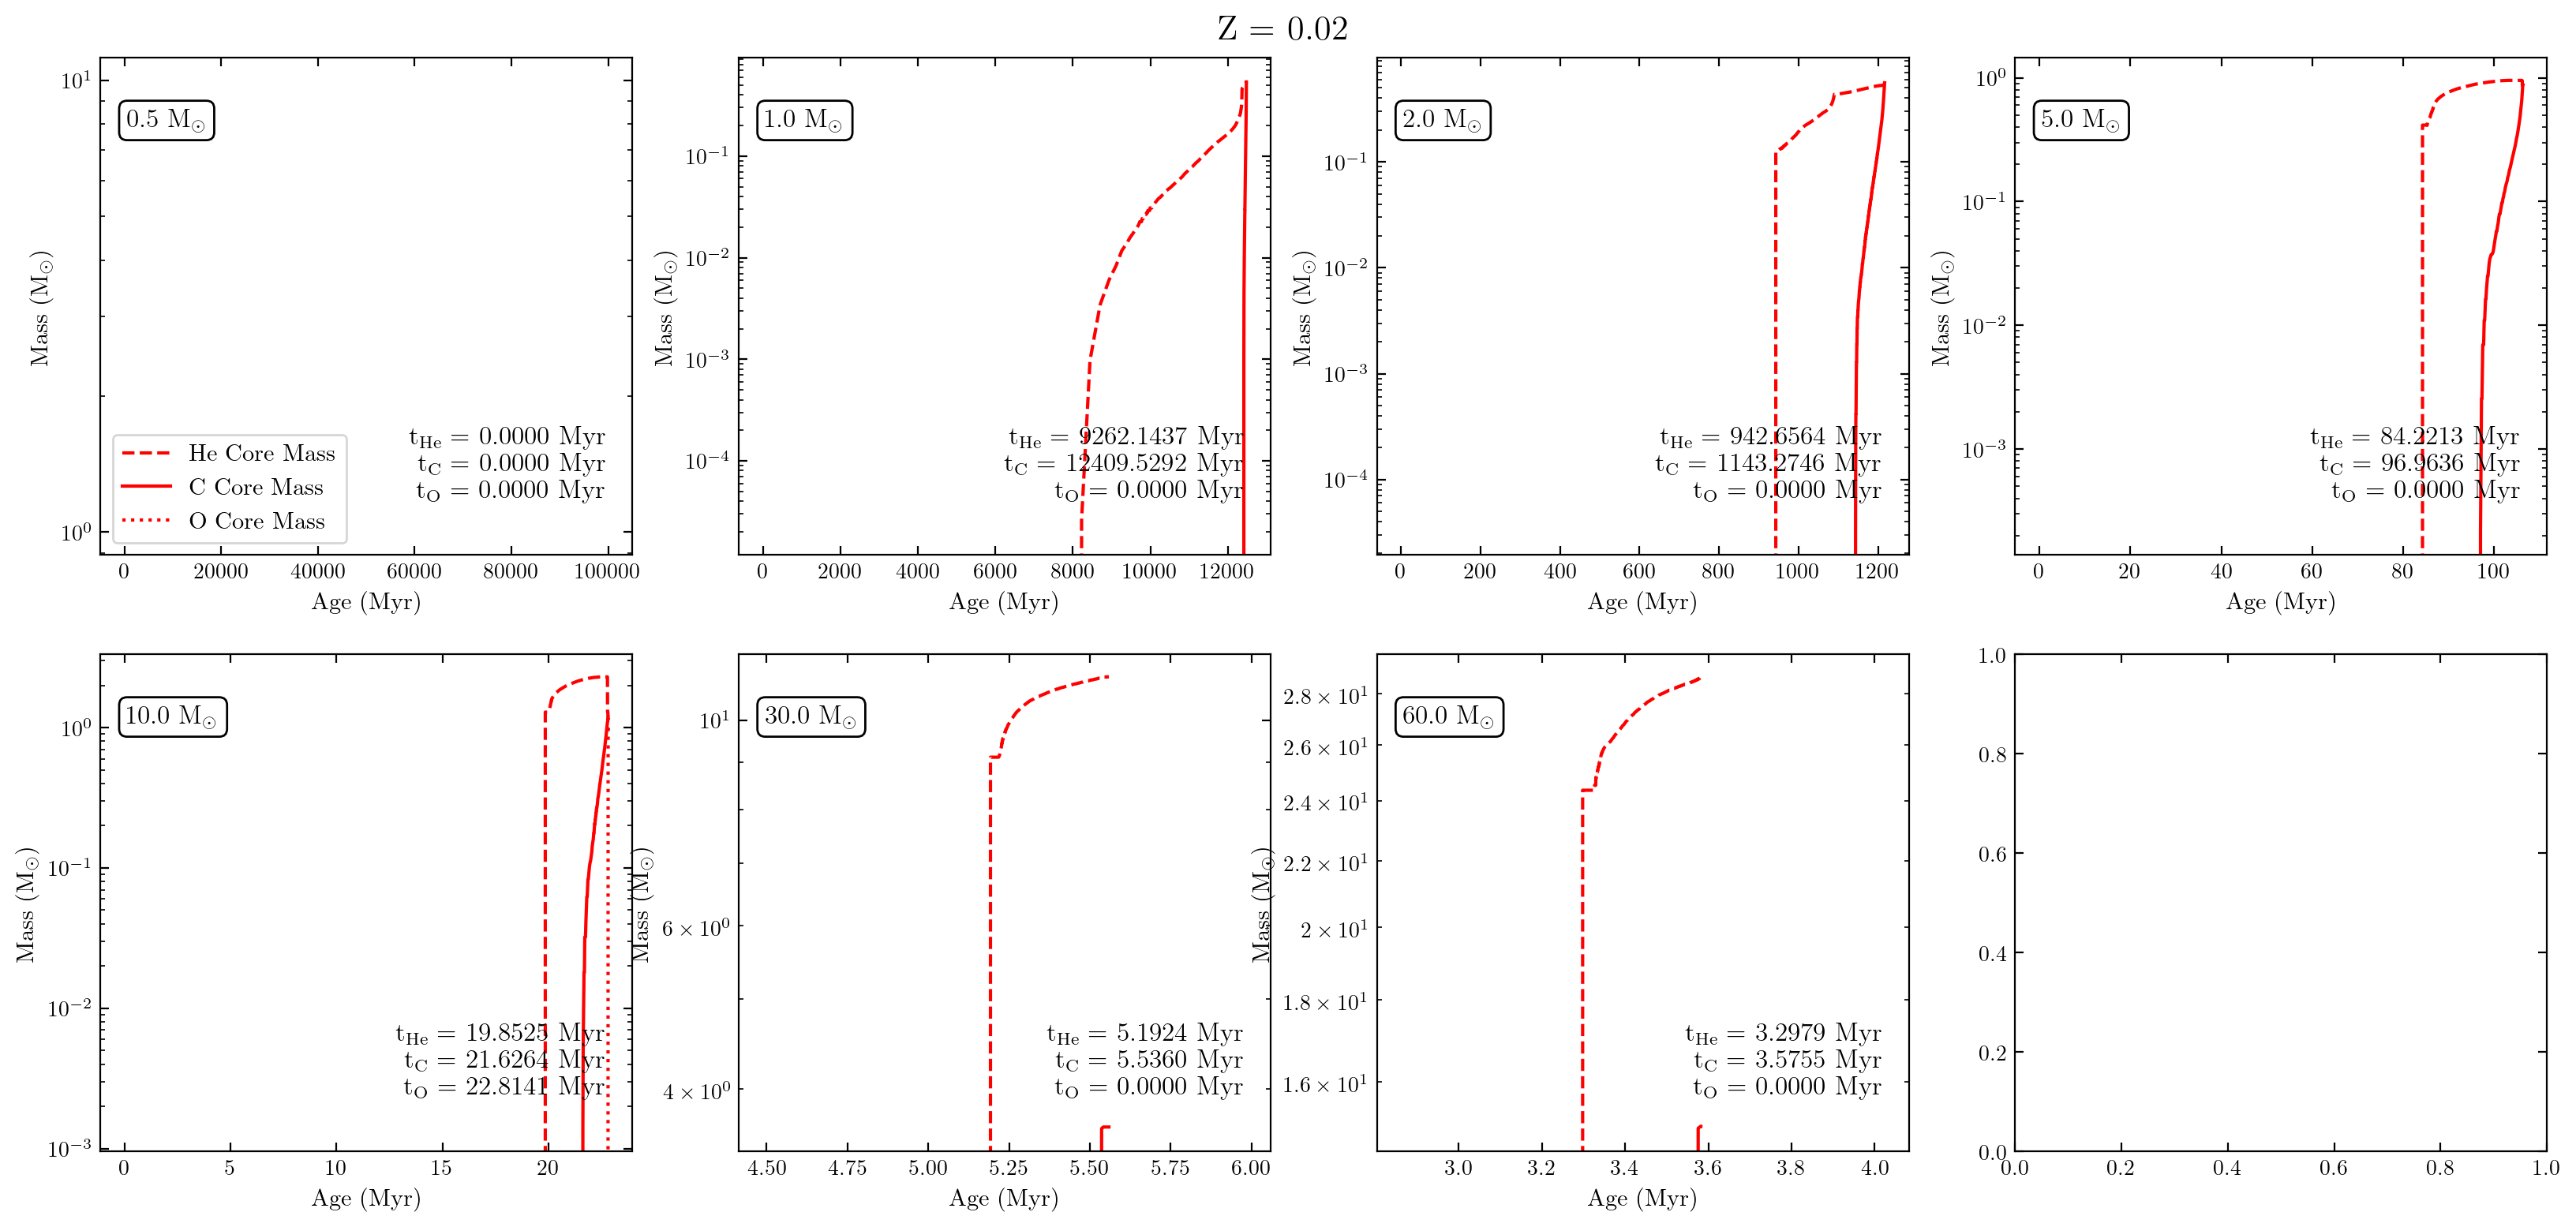

In [ ]:
# now do the same for the solar metallicity models
fig, ax = plt.subplots(2, 4, figsize=(20, 9), dpi=200)
plt.subplots_adjust(hspace=0.2)
ax = ax.flatten()
high_helium_burning_start = []
high_carbon_burning_start = []
high_oxygen_burning_start = []
for i, highh in enumerate(paths_solar_metals):
    hih = mr.MesaData(os.path.join("../{}".format(highh), "trimmed_history.data"))
    mass = masses[i]
    hi_teff = 10**hih.log_Teff
    hi_lum = 10**hih.log_L

    hi_ages = hih.star_age / 1e6
    hi_he_core_radius = hih.he_core_radius
    hi_he_core_mass = hih.he_core_mass
    hi_c_core_mass = hih.c_core_mass
    hi_ox_core_mass = hih.o_core_mass

    # find the first time when the Carbon core mass is non-zero
    try:
        t_carbon_flash_high = hi_ages[np.where(hi_c_core_mass > 0)[0][0]]
    except:
        t_carbon_flash_high = 0

    # same for oxygen
    try:
        t_oxygen_flash_high = hi_ages[np.where(hi_ox_core_mass > 0)[0][0]]
    except:
        t_oxygen_flash_high = 0

    # make xlim such that the mass is more than some fraction f
    f = 0.01
    try:
        t_helium_flash_high = hi_ages[np.where(hi_he_core_mass > f)[0][0]]
    except:
        t_helium_flash_high = 0

    print("--- mass: ", mass)
    print(f"t_helium_flash_high: {t_helium_flash_high:.2f} Myr")
    print(f"t_oxygen_flash_high: {t_oxygen_flash_high:.2f} Myr")
    print(f"t_carbon_flash_high: {t_carbon_flash_high:.2f} Myr")

    high_helium_burning_start.append(t_helium_flash_high)
    high_carbon_burning_start.append(t_carbon_flash_high)
    high_oxygen_burning_start.append(t_oxygen_flash_high)

    ax[i].plot(
        hi_ages, hi_he_core_mass, color="red", linestyle="--", label="He Core Mass"
    )
    ax[i].plot(hi_ages, hi_c_core_mass, color="red", label="C Core Mass")
    ax[i].plot(
        hi_ages, hi_ox_core_mass, color="red", linestyle=":", label="O Core Mass"
    )

    if i == 0:
        ax[i].legend(loc="lower left")

    if mass > 10:
        xlim = (t_helium_flash_high * 0.85, hi_ages.max() + 0.5)
        ax[i].set(
            xlabel="Age (Myr)", ylabel="Mass (M$_\odot$)", yscale="log", xlim=xlim
        )
    else:
        ax[i].set(xlabel="Age (Myr)", ylabel="Mass (M$_\odot$)", yscale="log")

    # add relevant timescales on the bottom right
    timescale_text = r"t$_{{\rm He}}$ = {:.4f} Myr" "\n".format(t_helium_flash_high)
    timescale_text += r"t$_{{\rm C}}$ = {:.4f} Myr" "\n".format(t_carbon_flash_high)
    timescale_text += r"t$_{{\rm O}}$ = {:.4f} Myr" "\n".format(t_oxygen_flash_high)

    ax[i].text(
        0.95,
        0.05,
        timescale_text,
        transform=ax[i].transAxes,
        fontsize=12,
        verticalalignment="bottom",
        horizontalalignment="right",
    )

    # add the mass label
    ax[i].text(
        0.05,
        0.85,
        f"{mass} M$_\odot$",
        transform=ax[i].transAxes,
        fontsize=12,
        verticalalignment="bottom",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    )

# add a figure title
fig.suptitle("Z = 0.02", fontsize=16, y=0.91)
ax[-1].axis("off")
plt.show()

### looking at the timescale for each burning to start for a given stellar mass 

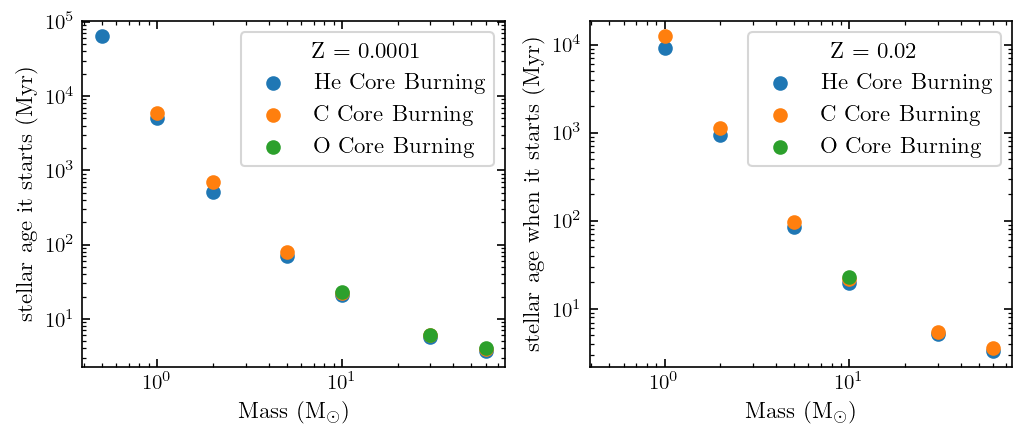

In [223]:
# plot the different timescales as a function of mass for both metallicities

fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=150)

ax[0].scatter(masses, low_helium_burning_start, label="He Core Burning", marker="o")
ax[0].scatter(masses, low_carbon_burning_start, label="C Core Burning", marker="o")
ax[0].scatter(masses, low_oxygen_burning_start, label="O Core Burning", marker="o")
ax[0].set(
    xlabel="Mass (M$_\odot$)",
    ylabel="stellar age it starts (Myr)",
    xscale="log",
    yscale="log",
)
ax[0].legend(title="Z = 0.0001")

ax[1].scatter(masses, high_helium_burning_start, label="He Core Burning", marker="o")
ax[1].scatter(masses, high_carbon_burning_start, label="C Core Burning", marker="o")
ax[1].scatter(masses, high_oxygen_burning_start, label="O Core Burning", marker="o")
ax[1].set(
    xlabel="Mass (M$_\odot$)",
    ylabel="stellar age when it starts (Myr)",
    xscale="log",
    yscale="log",
)
ax[1].legend(title="Z = 0.02")
plt.show()

> In additition to the table in the cells above for the relevant ages when the different forms of burning (helium, carbon, and oxygen) become relevant, which I defined as the species having at least f = 0.01 Msun of that given species mass, we also show above in the plot the age of the star when the different phases of burning occur for the solar metallicity (left) and the low metallicity (right) stars. 


### stellar radii, luminosities, and internal temperatures as a function of stellar age

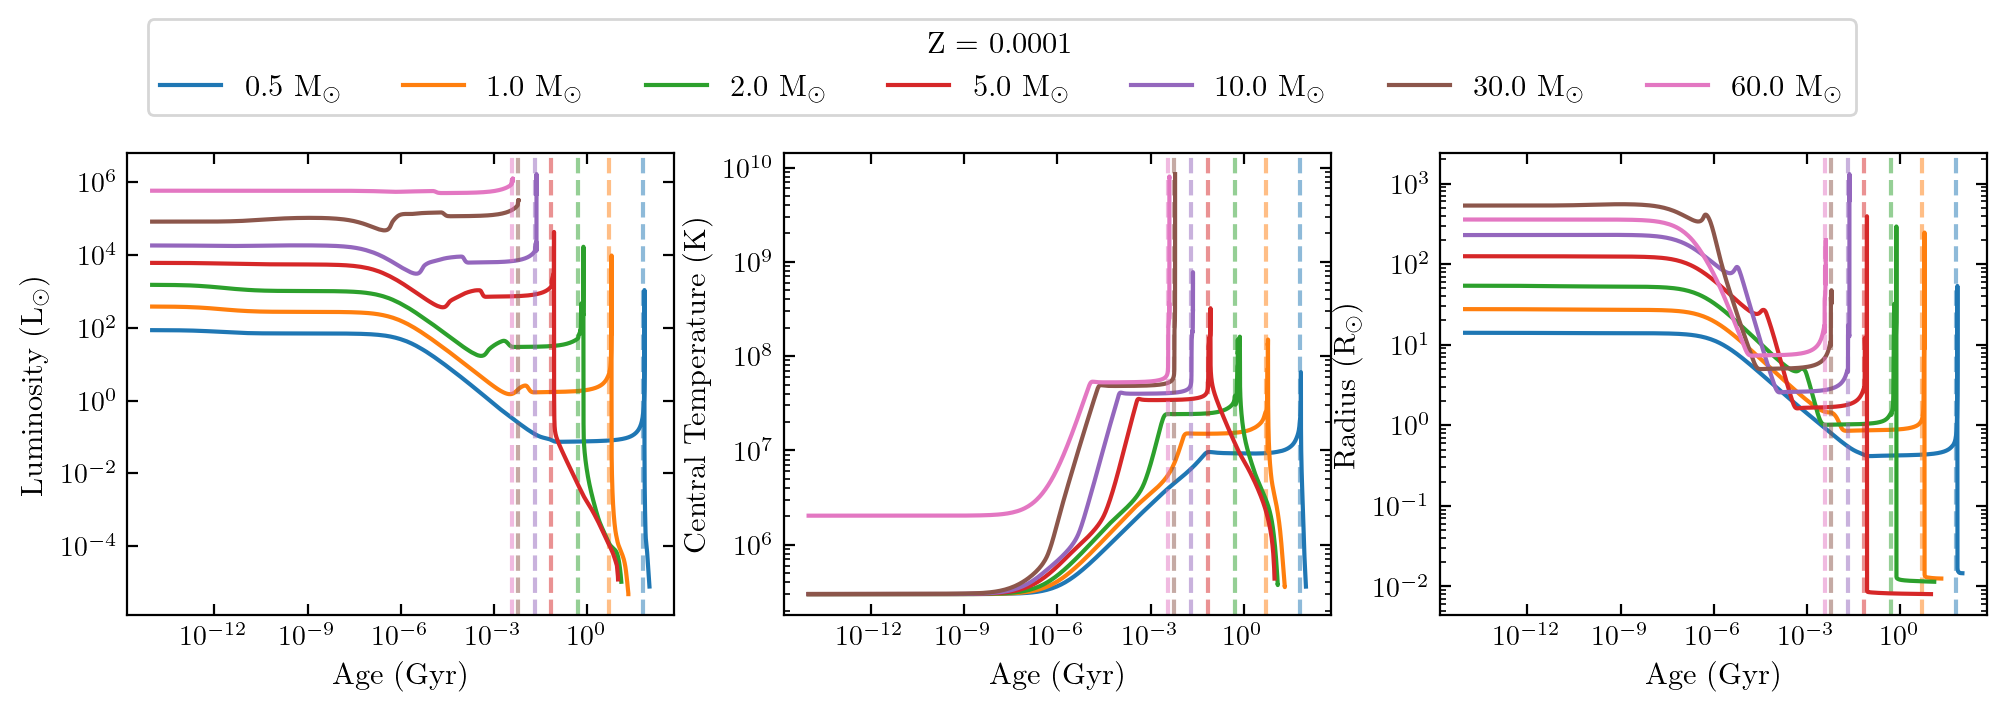

In [ ]:
# 3 panels depicting the luminosity as a function of time, temperature as a function of time, radius as a function of time for the
# low metallicity models, for each mass, with each panel having a different color for the different masses
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=200)

for i, lowh in enumerate(paths_low_metals):
    loh = mr.MesaData(os.path.join("../{}".format(lowh), "trimmed_history.data"))
    mass = masses[i]
    lo_teff = 10**loh.log_center_T
    lo_lum = 10**loh.log_L
    lo_radius = 10**loh.log_R

    lo_ages = loh.star_age / 1e9

    ax[0].plot(lo_ages, lo_lum, label=r"{:.1f} ${{\rm M_\odot}}$".format(mass))
    ax[1].plot(lo_ages, lo_teff)
    ax[2].plot(lo_ages, lo_radius)

    # get the color of the line above
    color = ax[0].lines[-1].get_color()

    ax[0].axvline(
        low_helium_burning_start[i] / 1e3, linestyle="--", alpha=0.5, color=color
    )
    ax[1].axvline(
        low_helium_burning_start[i] / 1e3, linestyle="--", alpha=0.5, color=color
    )
    ax[2].axvline(
        low_helium_burning_start[i] / 1e3, linestyle="--", alpha=0.5, color=color
    )

    ax[0].set(
        xlabel="Age (Gyr)", ylabel="Luminosity (L$_\odot$)", yscale="log", xscale="log"
    )
    ax[1].set(
        xlabel="Age (Gyr)", ylabel="Central Temperature (K)", yscale="log", xscale="log"
    )
    ax[2].set(
        xlabel="Age (Gyr)", ylabel="Radius (R$_\odot$)", yscale="log", xscale="log"
    )
ax[0].legend(loc="lower left", ncols=7, bbox_to_anchor=(0.01, 1.05), title="Z = 0.0001")
plt.show()

> As a point of comparison, we also overlay the times when helium starts to accumulate in the core/ when helium burning starts as dashed vertical lines for each stellar mass. By doing this, we confirm that the the helium flash is characterized by an increase in luminosity (left panel), a spike in internal temperature (centre panel), and is preceded by the star contracting/ its radius getting smaller and then a sudden increase in radius and then decreasing once more (right panel).

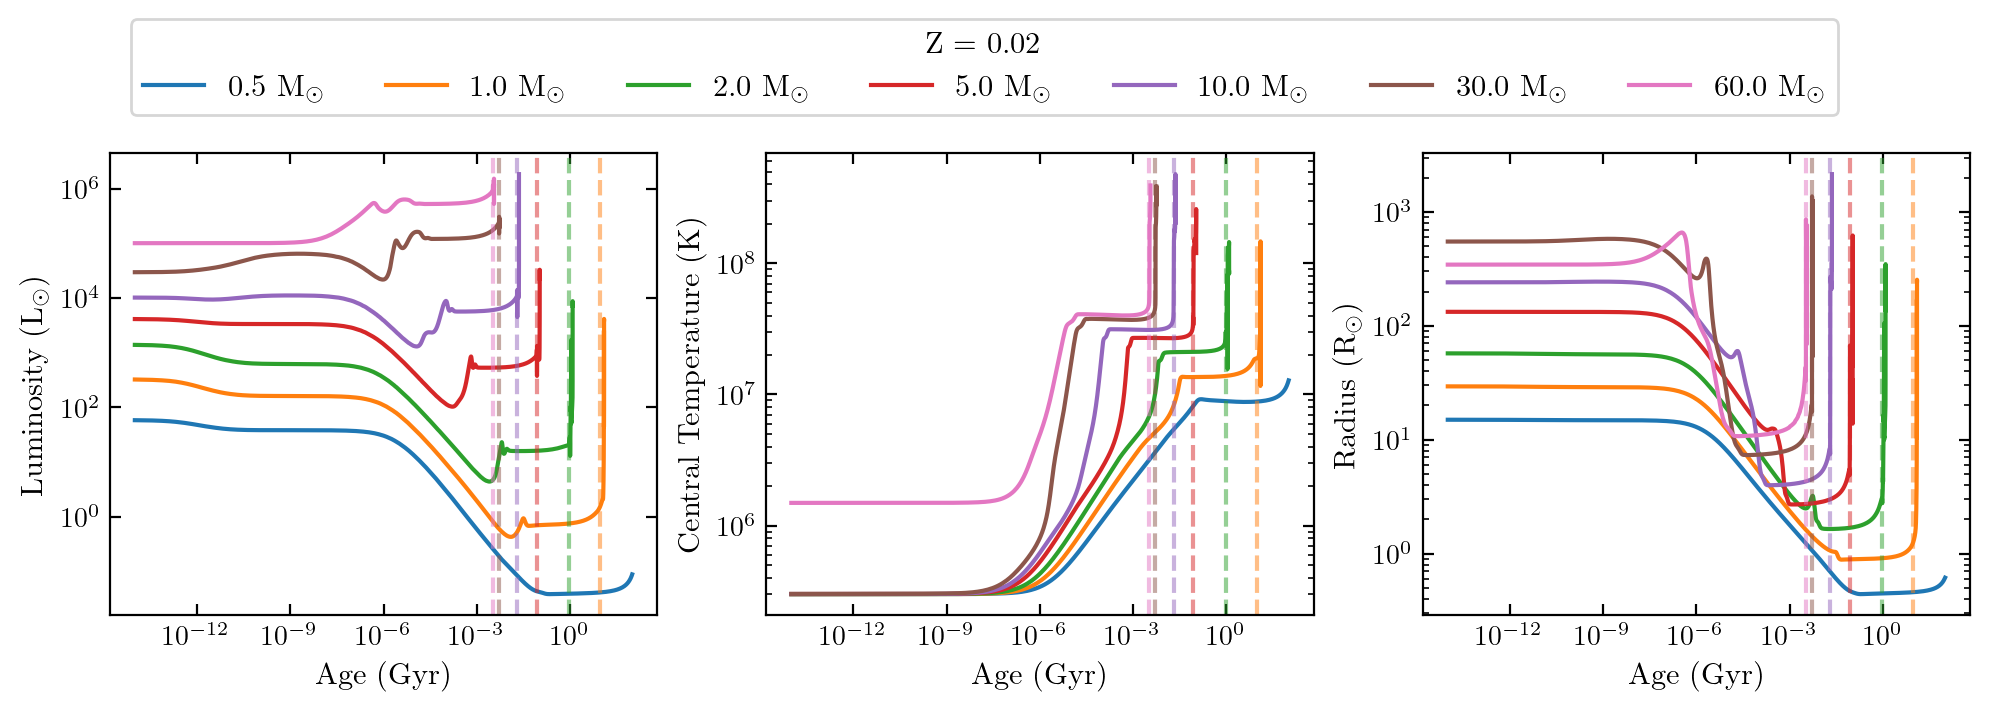

In [231]:
# 3 panels depicting the luminosity as a function of time, temperature as a function of time, radius as a function of time for the
# solar, for each mass, with each panel having a different color for the different masses
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=200)

for i, highh in enumerate(paths_solar_metals):
    hih = mr.MesaData(os.path.join("../{}".format(highh), "trimmed_history.data"))
    mass = masses[i]
    hi_teff = 10**hih.log_center_T
    hi_lum = 10**hih.log_L
    hi_radius = 10**hih.log_R

    hi_ages = hih.star_age / 1e9
    
    ax[0].plot(hi_ages, hi_lum, label=r"{:.1f} ${{\rm M_\odot}}$".format(mass))
    ax[1].plot(hi_ages, hi_teff)
    ax[2].plot(hi_ages, hi_radius)
    # get the color of the line above
    color = ax[0].lines[-1].get_color()
    ax[0].axvline(
        high_helium_burning_start[i] / 1e3, linestyle="--", alpha=0.5, color=color
    )
    ax[1].axvline(
        high_helium_burning_start[i] / 1e3, linestyle="--", alpha=0.5, color=color
    )
    ax[2].axvline(
        high_helium_burning_start[i] / 1e3, linestyle="--", alpha=0.5, color=color
    )

    ax[0].set(
        xlabel="Age (Gyr)", ylabel="Luminosity (L$_\odot$)", yscale="log", xscale="log"
    )
    ax[1].set(
        xlabel="Age (Gyr)", ylabel="Central Temperature (K)", yscale="log", xscale="log"
    )
    ax[2].set(
        xlabel="Age (Gyr)", ylabel="Radius (R$_\odot$)", yscale="log", xscale="log"
    )
ax[0].legend(loc="lower left", ncols=7, bbox_to_anchor=(0.01, 1.05), title="Z = 0.02")
plt.show()

> Same as the figure above, but for the solar metallicity star. In our 0.5 Msun model, He flash does not happen withint 1e11 yrs, so w don't have that indicating line, otherwise, it is rather still consistent. 

## Binary evolution (1 Msun + 5 Msun)